# **Mall_Customer Dataset**

## **Importing All Necessary Library**


**1. Data Processing**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Loading the Given Dataset**

In [18]:
data = pd.read_csv("Mall_Customers.csv")
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [21]:
X=data.iloc[:, [3,4]].values

**2.using the elbow method to find optimal number of clusters**

In [22]:
# import kMean from sklean
from sklearn.cluster import KMeans

<function matplotlib.pyplot.show>

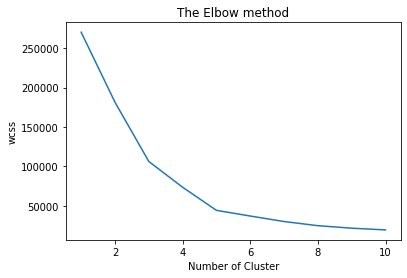

In [23]:
# let's plot elbow method graph
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show

**3. Applying kMeans to the mall dataset and Visualising the Clusters**

In [24]:
# so applying take five cluster on the basis of elbow method
kmeans = KMeans(n_clusters= 5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [25]:
# predict the cluster
y_kmeans = kmeans.fit_predict(X)

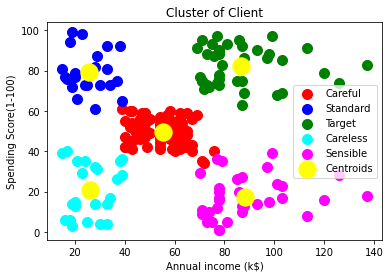

In [26]:
# Visulising the five Cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label = 'Sensible')
# apply centroid for all cluster
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1] , s=300, c='yellow', label = 'Centroids')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()